In [1]:
# baalightcurve, but using jupyter to get more interactive with the data
#  New method: based on astropy Table (from AAVSO tutorial)
import matplotlib.pyplot as plt
import os
import datetime
from astropy.table import Table
from astropy.time import Time
import pandas as pd
%matplotlib widget

In [2]:
# Functions for plotting.  
# take astropy Time objects as time axes to do JD -> UTC conversion
# define forward and reverse transforms for time conversion for second axis plotting
def forward(t_jd):
    ''' 
    t_jd is a numpy array of JD. Convert to Time object, then return decimal year equivalent
    '''
    t_decimalyr = Time(t_jd, format='jd').to_value(format='decimalyear')
    return t_decimalyr

def reverse(t_decimalyr):
    '''
    t_decimalyr is numpy array of astropy decimal year format values
    '''
    t_jd = Time(t_decimalyr, format='decimalyear').to_value(format='jd')
    return t_jd   

def plot_lightcurve(alldata_time, alldata_mag, chart_title, JDmin, JDmax):
    fig=plt.figure()
    ax1=fig.add_subplot(1,1,1)
    #  plot
    ax1.scatter(alldata_time.jd, alldata_mag, marker='.')
    ax2 = ax1.secondary_xaxis('top', functions=(forward, reverse))
    plt.gca().invert_yaxis()
    plt.title(chart_title)
    plt.xlim([JDmin, JDmax])
    xvals = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in xvals])    

def plot_mylightcurve_twoaxis(alldata_time, alldata_mag, mydata_time, mydata_mag, chart_title, JDmin, JDmax):
    fig=plt.figure()
    ax1=fig.add_subplot(1,1,1)
    #  plot
    ax1.scatter(alldata_time.jd, alldata_mag, marker='.')
    ax1.scatter(mydata_time.jd, mydata_mag, marker='x')
    ax2 = ax1.secondary_xaxis('top', functions=(forward, reverse))
    plt.gca().invert_yaxis()
    plt.title(chart_title)
    plt.xlim([JDmin, JDmax])
    xvals = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in xvals])

In [3]:
vssdir='/home/john/astro/variable_star_data/baa'

file_list = os.listdir(vssdir)

# housekeeping: remove spaces from downloaded baa file names
for var_file in file_list:
    if ' ' in var_file:
        var_file_new = var_file.replace(' ','_')
        print(var_file, '>>> ',var_file_new)
        #print(os.path.join(vssdir, var_file), '>>> ',os.path.join(vssdir, var_file_new))
        os.rename(os.path.join(vssdir, var_file), os.path.join(vssdir,var_file_new))
        
vss_file_list = os.listdir(vssdir)
print(vss_file_list)

['BU_TAU_20221210_114356.csv', 'W_CMA_20221210_114515.csv', 'UV_CAM_20221210_114424.csv', 'RV_MON_20221210_114458.csv', 'U_HYA_20221210_114603.csv', 'ZZ_CAM_20221210_114414.csv', 'KK_PER_20221210_114317.csv', 'W_TRI_20221210_114341.csv', 'KK_PER_20221210_114330.csv', 'TV_PSC_20221210_114022.csv', 'RT_CNC_20221210_114533.csv', 'EG_AND_20221210_114243.csv', 'TU_GEM_20221210_114444.csv', 'TV_UMA_20221210_114547.csv', 'Z_PSC_20221210_114303.csv', 'RW_VIR_20221210_114620.csv']


In [150]:
# define the variable star data file here
vssfile = vss_file_list[10]
print(vssfile)

RT_CNC_20221210_114533.csv


In [151]:
# get baa data, load as astropy Table
star_name=vssfile.split('_2')[0]
vssfullpath = os.path.join(vssdir, vssfile)
baa_data = Table.read(vssfullpath, encoding='UTF-8')
#baa_data.show_in_browser(jsviewer=True)

In [152]:
# What's the syntax for feinter than/brighter than?
# create a pandas data frame of the same data
# this is a rather ungainly way to do it, ideally work with one table/data frame
baa_data_pd = baa_data.to_pandas()

In [153]:
baa_data_pd.head()

,Object,Julian Date,UT,Magnitude Qualifier,Magnitude,Magnitude Error,Observer Name,Method,Equipment,Filter,Chart / Sequence,Visual Estimates,CCD Measurement Data: Measurement Type;Star Type;Star Id;Measured Mag;Measured Error;Reference Mag;Reference Error,Observation_Id
0,RT CNC,2459908.731,25 Nov 2022 05:33:00,Equal,8.2,NaN,J Toone,Visual,B15X70,No Filter,311.01,D(1)V(2)E,NaN,4642419
1,RT CNC,2459906.489,22 Nov 2022 23:44:00,Equal,8.3,NaN,R B I Fraser,Visual,B10 X50,No Filter,311.01,D(3)V(2)E,NaN,4635922
2,RT CNC,2459902.647,19 Nov 2022 03:32:00,Equal,8.2,NaN,J Toone,Visual,B15X70,No Filter,311.01,D(1)V(2)E,NaN,4642418
3,RT CNC,2459885.709,2 Nov 2022 05:01:00,Equal,8.4,NaN,J Toone,Visual,B15X70,No Filter,311.01,D(4)V(1)E,NaN,4642417
4,RT CNC,2459877.686,25 Oct 2022 04:28:00,Equal,8.4,NaN,J Toone,Visual,B15X70,No Filter,311.01,D(3)V(1)E,NaN,4623939


In [154]:
# use the pandas shortcut value.counts()
baa_data_pd['Magnitude Qualifier'].value_counts()

Equal    1893
Name: Magnitude Qualifier, dtype: int64

In [155]:
# an alternative way of doing the same is by using groupby
# this sorts by Magnitude Qualifier
baa_data_pd.groupby('Magnitude Qualifier').head()

,Object,Julian Date,UT,Magnitude Qualifier,Magnitude,Magnitude Error,Observer Name,Method,Equipment,Filter,Chart / Sequence,Visual Estimates,CCD Measurement Data: Measurement Type;Star Type;Star Id;Measured Mag;Measured Error;Reference Mag;Reference Error,Observation_Id
0,RT CNC,2459908.731,25 Nov 2022 05:33:00,Equal,8.2,NaN,J Toone,Visual,B15X70,No Filter,311.01,D(1)V(2)E,NaN,4642419
1,RT CNC,2459906.489,22 Nov 2022 23:44:00,Equal,8.3,NaN,R B I Fraser,Visual,B10 X50,No Filter,311.01,D(3)V(2)E,NaN,4635922
2,RT CNC,2459902.647,19 Nov 2022 03:32:00,Equal,8.2,NaN,J Toone,Visual,B15X70,No Filter,311.01,D(1)V(2)E,NaN,4642418
3,RT CNC,2459885.709,2 Nov 2022 05:01:00,Equal,8.4,NaN,J Toone,Visual,B15X70,No Filter,311.01,D(4)V(1)E,NaN,4642417
4,RT CNC,2459877.686,25 Oct 2022 04:28:00,Equal,8.4,NaN,J Toone,Visual,B15X70,No Filter,311.01,D(3)V(1)E,NaN,4623939


In [156]:
# this sorts by Observer
baa_data_pd.groupby('Observer Name').head()

,Object,Julian Date,UT,Magnitude Qualifier,Magnitude,Magnitude Error,Observer Name,Method,Equipment,Filter,Chart / Sequence,Visual Estimates,CCD Measurement Data: Measurement Type;Star Type;Star Id;Measured Mag;Measured Error;Reference Mag;Reference Error,Observation_Id
0,RT CNC,2.459909e+06,25 Nov 2022 05:33:00,Equal,8.20,NaN,J Toone,Visual,B15X70,No Filter,311.01,D(1)V(2)E,NaN,4642419
1,RT CNC,2.459906e+06,22 Nov 2022 23:44:00,Equal,8.30,NaN,R B I Fraser,Visual,B10 X50,No Filter,311.01,D(3)V(2)E,NaN,4635922
2,RT CNC,2.459903e+06,19 Nov 2022 03:32:00,Equal,8.20,NaN,J Toone,Visual,B15X70,No Filter,311.01,D(1)V(2)E,NaN,4642418
3,RT CNC,2.459886e+06,2 Nov 2022 05:01:00,Equal,8.40,NaN,J Toone,Visual,B15X70,No Filter,311.01,D(4)V(1)E,NaN,4642417
4,RT CNC,2.459878e+06,25 Oct 2022 04:28:00,Equal,8.40,NaN,J Toone,Visual,B15X70,No Filter,311.01,D(3)V(1)E,NaN,4623939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,RT CNC,2.448328e+06,12 Mar 1991 22:45:59.040000,Equal,7.65,NaN,G Pointer,Visual,B10X50,No Filter,1,D-1;E+2,\n,394938
1889,RT CNC,2.440878e+06,18 Oct 1970 04:24:00,Equal,8.00,NaN,J E Isles,Visual,unknown,No Filter,unknown,not available,NaN,3208868
1890,RT CNC,2.440869e+06,9 Oct 1970 02:53:00,Equal,8.20,NaN,J E Isles,Visual,unknown,No Filter,unknown,not available,NaN,3208867
1891,RT CNC,2.440738e+06,31 May 1970 22:14:00,Equal,7.40,NaN,J E Isles,Visual,unknown,No Filter,unknown,not available,NaN,3208866


In [157]:
# this version is comprehensive
baa_data_pd.groupby('Observer Name').count()

,Object,Julian Date,UT,Magnitude Qualifier,Magnitude,Magnitude Error,Method,Equipment,Filter,Chart / Sequence,Visual Estimates,CCD Measurement Data: Measurement Type;Star Type;Star Id;Measured Mag;Measured Error;Reference Mag;Reference Error,Observation_Id
Observer Name,,,,,,,,,,,,,
B J Beesley,11,11,11,11,11,0,11,11,11,11,11,11,11
B MacDonald,12,12,12,12,12,0,12,12,12,12,12,0,12
B R M Munden,34,34,34,34,34,0,34,34,34,34,34,8,34
E W Sawyer,1,1,1,1,1,0,1,1,1,1,1,0,1
G Fleming,27,27,27,27,27,27,27,27,27,27,0,27,27
G Pointer,5,5,5,5,5,0,5,5,5,5,5,2,5
G Ramsay,15,15,15,15,15,0,15,15,15,15,15,0,15
I A Middlemist,9,9,9,9,9,0,9,9,9,9,9,0,9
I P Nartowicz,45,45,45,45,45,0,45,45,45,45,45,32,45


In [158]:
# this version adda the ['Observer Name'] selection in [] brackets to report only the number of instances of
# this column (rather than the numbre of times the Observers enter notes, for example)
baa_data_pd.groupby('Observer Name')['Observer Name'].count()

Observer Name
B J Beesley        11
B MacDonald        12
B R M Munden       34
E W Sawyer          1
G Fleming          27
G Pointer           5
G Ramsay           15
I A Middlemist      9
I P Nartowicz      45
J E Isles           4
J Farrer            1
J Toone           845
M Barrett          33
M D Taylor        142
R B I Fraser      174
R Pearce            6
S Johnston          1
S W Albrighton    266
T L Heywood        28
T Markham         225
V G Mormyl          9
Name: Observer Name, dtype: int64

In [159]:
baa_data_pd[baa_data_pd['Magnitude Qualifier']=='Brighter']

,Object,Julian Date,UT,Magnitude Qualifier,Magnitude,Magnitude Error,Observer Name,Method,Equipment,Filter,Chart / Sequence,Visual Estimates,CCD Measurement Data: Measurement Type;Star Type;Star Id;Measured Mag;Measured Error;Reference Mag;Reference Error,Observation_Id


In [160]:
baa_data_pd[baa_data_pd['Magnitude Qualifier']=='Fainter']

,Object,Julian Date,UT,Magnitude Qualifier,Magnitude,Magnitude Error,Observer Name,Method,Equipment,Filter,Chart / Sequence,Visual Estimates,CCD Measurement Data: Measurement Type;Star Type;Star Id;Measured Mag;Measured Error;Reference Mag;Reference Error,Observation_Id


In [161]:
# find my observations
my_baa_data = Table(dtype=baa_data.dtype)
for observation in baa_data:
    if 'C J Evans' in observation['Observer Name']:
        my_baa_data.add_row(observation)
print(my_baa_data)        
# convert time axis to astropy Time for jd<->decimalyear calcs

baa_time = Time(baa_data['Julian Date'], format='jd')
my_baa_time = Time(my_baa_data['Julian Date'], format='jd')

Object Julian Date ... Observation_Id
------ ----------- ... --------------


In [162]:
len(my_baa_data) > 0

False

/tmp/ipykernel_52853/1596985028.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in xvals])
/home/john/miniconda3/envs/astro/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 2 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/john/miniconda3/envs/astro/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 2 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/john/miniconda3/envs/astro/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 2 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


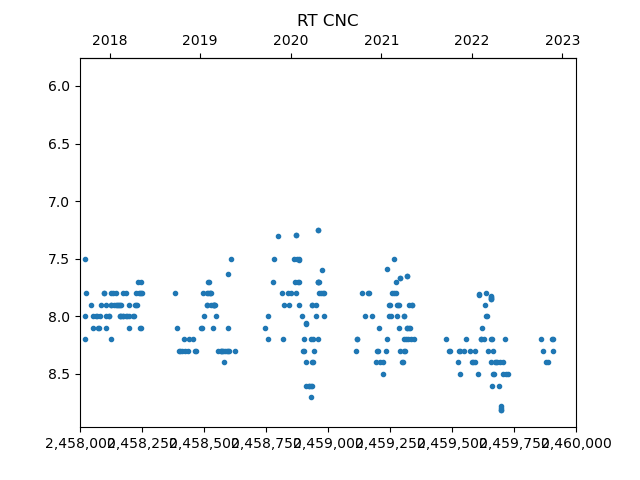

In [163]:
# plot all data, overlaying my observations
if len(my_baa_data) > 0:
    plot_mylightcurve_twoaxis(baa_time, baa_data['Magnitude'], my_baa_time, 
                              my_baa_data['Magnitude'], my_baa_data['Object'][0], 2458000, 2460000)
else:
    plot_lightcurve(baa_time, baa_data['Magnitude'], baa_data['Object'][0], 2458000, 2460000)
